# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Read target csv
subset_name = 'target_subset_' + Path('.').resolve().name
df = pd.read_csv(f'../../../../data/interim/{subset_name}.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True
...,...,...,...,...,...,...,...,...,...
295,6MGH_A,1.950,2019-05-01T00:00:00Z,>6mgh_A mol:protein length:163 miRFP670nano,MGSHHHHHHGRSAAGTMANLDKMLNTTVTEVRQFLQVDRVCVFQFE...,163,8,8,False
296,6K2F_A,1.550,2019-06-05T00:00:00Z,>6k2f_A mol:protein length:138 Actin binding ...,AIELSTDLINKFKDMNSSGNGRFIQATIVDETINIKAIEQGTSDFD...,138,2,2,False
297,6WJA_A,2.098,2021-03-03T00:00:00Z,>6wja_A mol:protein length:310 NAD-dependent ...,MSAERILVTGGAGFIGSHLVDALLAKGYAVRVLDDLSTGKVGNLPM...,310,6,6,False
298,7CUZ_A,2.420,2021-04-28T00:00:00Z,>7cuz_A mol:protein length:312 Acetylxylan es...,MTKINNWQDYQGSSLKPEDFDKFWDEKINLVSNHQFEFELIEKNLS...,312,4,4,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

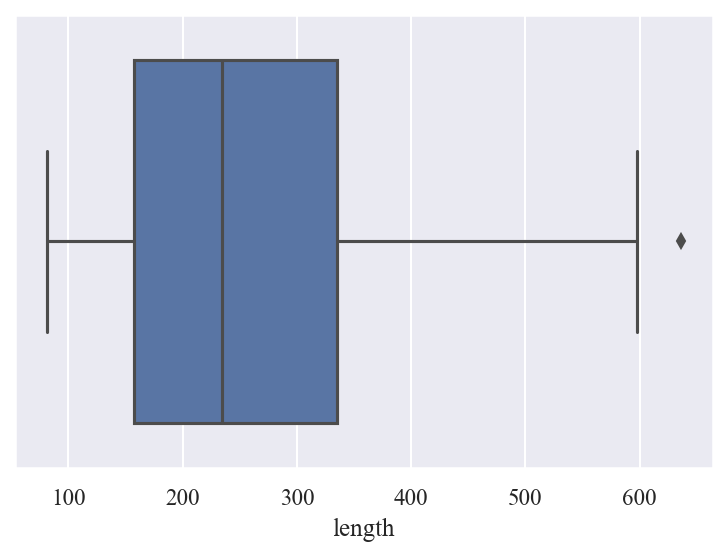

In [5]:
# Sequence length
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

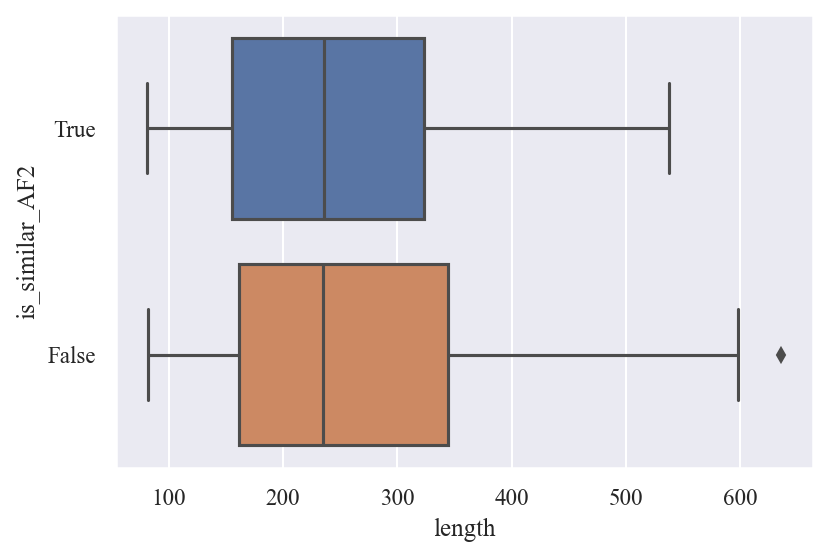

In [6]:
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

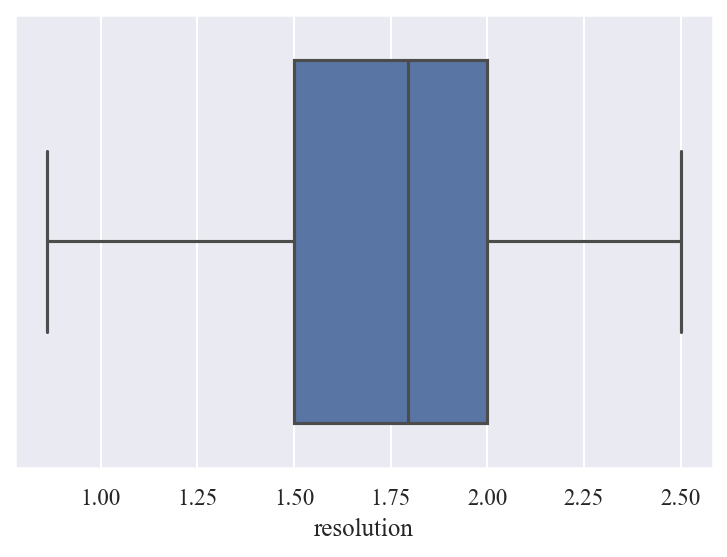

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

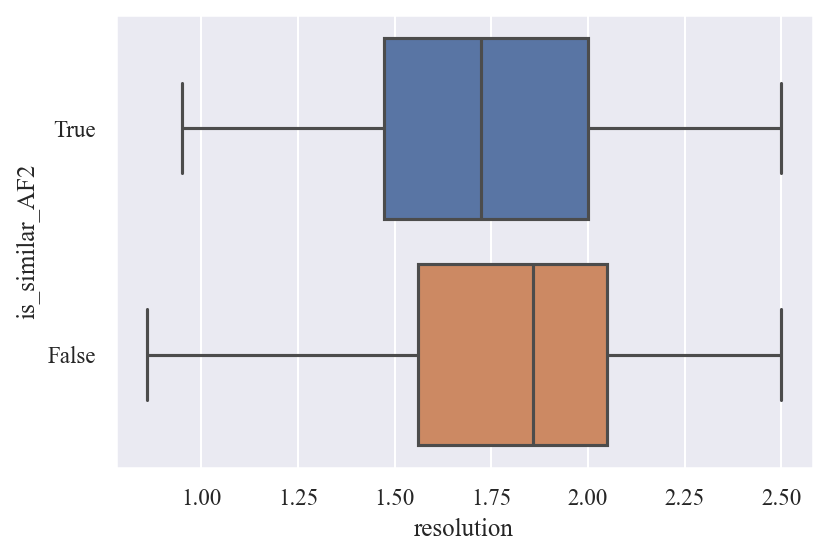

In [8]:
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

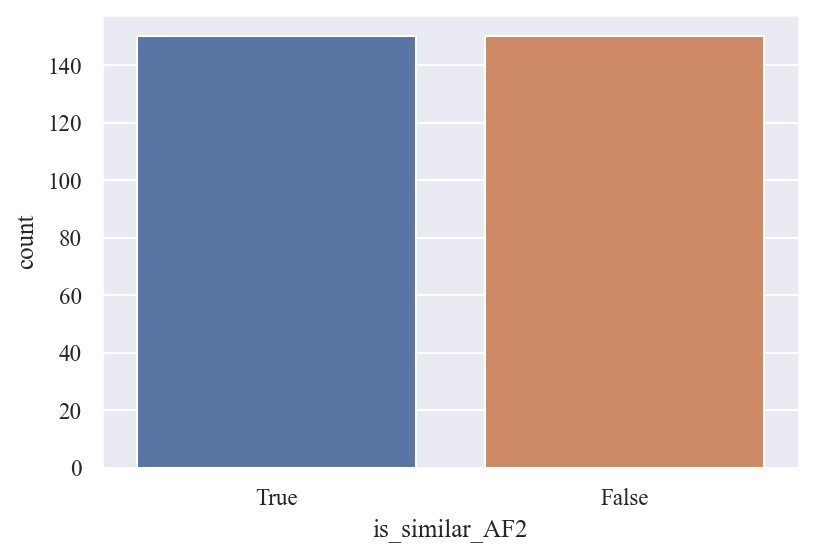

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
sns.countplot(data=df, x='is_similar_AF2')

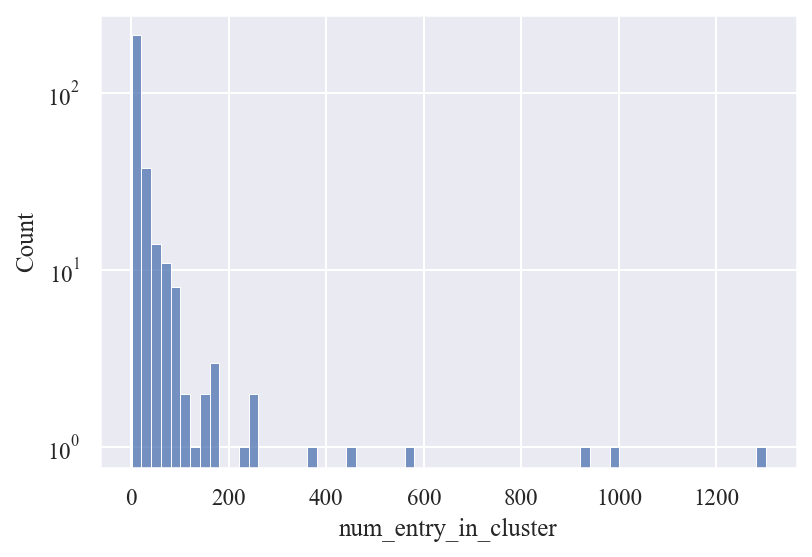

In [10]:
sns.histplot(df['num_entry_in_cluster'], binwidth=20)
plt.yscale('log')

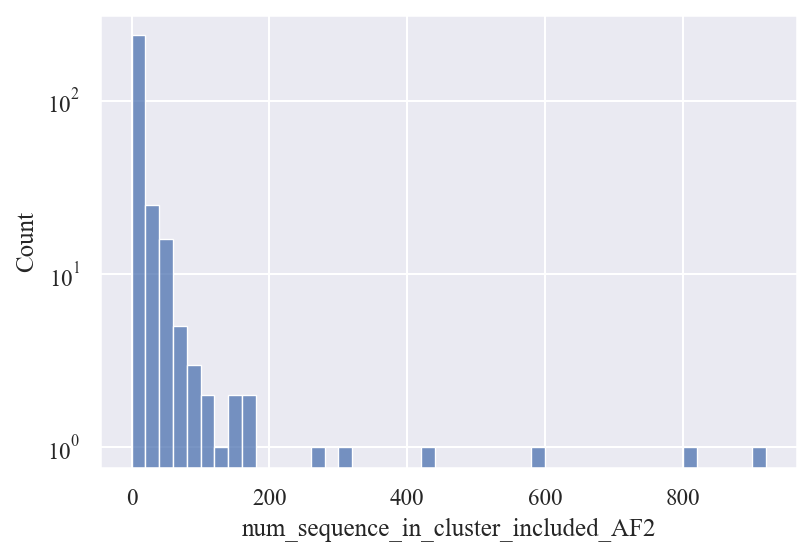

In [11]:
sns.histplot(df['num_sequence_in_cluster_included_AF2'], binwidth=20)
plt.yscale('log')

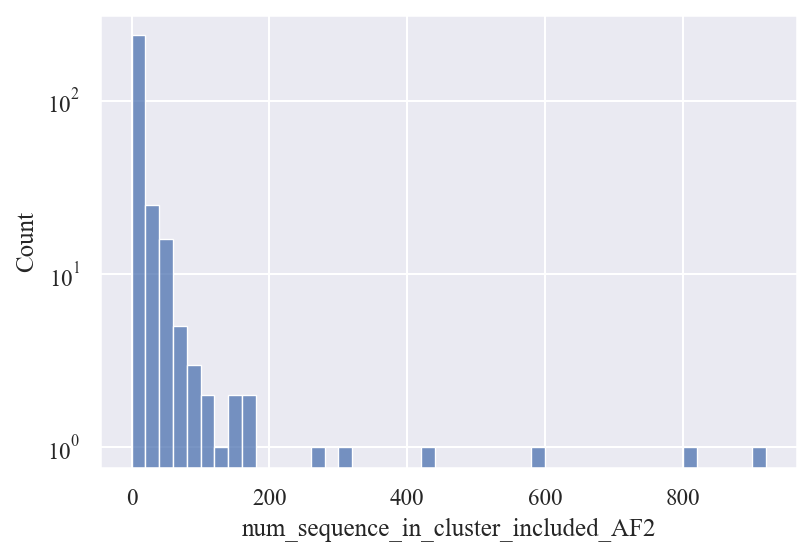

In [12]:
sns.histplot(df['num_sequence_in_cluster_included_AF2'], binwidth=20)
plt.yscale('log')

## Check domain number using CATH definition

In [31]:
domain_num_df = pd.read_csv('../../../../data/interim/cath_domain_num.csv')
domain_num_df

,id,num_domain
0,101M_A,1
1,102L_A,1
2,102M_A,1
3,103L_A,1
4,103M_A,1
...,...,...
357291,9XIA_A,1
357292,9XIM_A,1
357293,9XIM_B,1
357294,9XIM_C,1


In [32]:
pd.merge(df, domain_num_df, on='id', how='inner')

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2,num_domain
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True,85,1
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True,50,1
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True,2,3
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True,18,1
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True,317,1
...,...,...,...,...,...,...,...,...,...,...,...
100,6QWT_A,2.300,2021-05-19T00:00:00Z,>6qwt_A mol:protein length:472 Genome polypro...,SEILACEPGGPPPHVPRRSKLVKSPAYGAFPVTKEPAVLSRHDRRT...,472,3,3,False,0,1
101,6HCI_A,2.120,2021-06-23T00:00:00Z,>6hci_A mol:protein length:105 Titin,HPPPTDSTLRPMFKRLLANAECQEGQSVCFEIRVSGIPPPTLKWEK...,105,4,4,False,0,1
102,6OH6_A,2.073,2018-07-04T00:00:00Z,>6oh6_A mol:protein length:342 Labdane-relate...,MTDTDDGGTMLPLPDFTATFPEPFPAGPHSERTEHRLLDWLEEHPL...,342,4,4,False,0,1
103,6MGH_A,1.950,2019-05-01T00:00:00Z,>6mgh_A mol:protein length:163 miRFP670nano,MGSHHHHHHGRSAAGTMANLDKMLNTTVTEVRQFLQVDRVCVFQFE...,163,8,8,False,0,1


## Check domain number using ECOD definition

In [34]:
domain_num_df = pd.read_csv('../../../../data/interim/ecod_domain_num.csv')
domain_num_df

,id,num_domain
0,101M_A,1
1,102L_A,1
2,102M_A,1
3,103L_A,1
4,103M_A,1
...,...,...
548056,9XIA_A,1
548057,9XIM_A,1
548058,9XIM_B,1
548059,9XIM_C,1


In [36]:
merge_df = pd.merge(df, domain_num_df, on='id', how='inner')
merge_df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2,num_sequence_in_cluster_included_AF2,num_domain
0,6AN4_A,1.470,2019-04-17T00:00:00Z,>6an4_A mol:protein length:158 2-amino-4-hydr...,TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...,158,90,5,True,85,1
1,5ZHE_A,2.180,2021-03-03T00:00:00Z,">5zhe_A mol:protein length:253 Ditrans,polyci...",MMLSATQPLSEKLPAHGCRHVAIIMDGNGRWAKKQGKIRAFGHKAG...,253,52,2,True,50,1
2,5ZCT_A,2.050,2019-03-27T00:00:00Z,>5zct_A mol:protein length:306 Ribosomal prot...,MKIAILSRDGTLYSCKRLREAAIQRGHLVEILDPLSCYMNINPAAS...,306,11,9,True,2,2
3,6IYB_A,2.096,2020-08-05T00:00:00Z,>6iyb_A mol:protein length:199 Ras-related pr...,GSAMGSTSRKKVLLKVIILGDSGVGKTSLMNQYVNKKFSNQYKATI...,199,20,2,True,18,1
4,6PXX_B,1.500,2019-12-11T00:00:00Z,>6pxx_B mol:protein length:265 Beta-lactamase,MRVLALSAVFLVASIIGMPAVAKEWQENKSWNAHFTEHKSQGVVVL...,265,447,130,True,317,2
...,...,...,...,...,...,...,...,...,...,...,...
274,6MGH_A,1.950,2019-05-01T00:00:00Z,>6mgh_A mol:protein length:163 miRFP670nano,MGSHHHHHHGRSAAGTMANLDKMLNTTVTEVRQFLQVDRVCVFQFE...,163,8,8,False,0,1
275,6K2F_A,1.550,2019-06-05T00:00:00Z,>6k2f_A mol:protein length:138 Actin binding ...,AIELSTDLINKFKDMNSSGNGRFIQATIVDETINIKAIEQGTSDFD...,138,2,2,False,0,1
276,6WJA_A,2.098,2021-03-03T00:00:00Z,>6wja_A mol:protein length:310 NAD-dependent ...,MSAERILVTGGAGFIGSHLVDALLAKGYAVRVLDDLSTGKVGNLPM...,310,6,6,False,0,1
277,7CUZ_A,2.420,2021-04-28T00:00:00Z,>7cuz_A mol:protein length:312 Acetylxylan es...,MTKINNWQDYQGSSLKPEDFDKFWDEKINLVSNHQFEFELIEKNLS...,312,4,4,False,0,1


In [37]:
merge_df.value_counts('num_domain')

num_domain
1    202
2     73
3      3
4      1
dtype: int64

In [38]:
no_data_target = list(set(df['id'].unique()) - set(domain_num_df['id'].unique()))
print(no_data_target, len(no_data_target))

['7N50_A', '6S9T_A', '7CUP_A', '7RTY_A', '6T8D_X', '6SUL_A', '6DHP_u', '7CIW_A', '7EL1_E', '6NNW_A', '7KIH_A', '6TNJ_A', '7L4C_A', '6LH8_A', '6I6H_A', '6GIT_A', '6NQ6_B', '7CV7_A', '6Y0K_AAA', '6LK7_A', '5WHF_A'] 21


In [39]:
df.query('id in @no_data_target')[['id', 'releasedate']].sort_values('releasedate')

,id,releasedate
72,7L4C_A,2018-07-04T00:00:00Z
226,7KIH_A,2018-08-08T00:00:00Z
133,5WHF_A,2019-02-27T00:00:00Z
217,6I6H_A,2019-04-03T00:00:00Z
237,6GIT_A,2019-04-17T00:00:00Z
273,6NNW_A,2019-07-24T00:00:00Z
201,6T8D_X,2019-12-25T00:00:00Z
286,6LK7_A,2020-01-08T00:00:00Z
75,6NQ6_B,2020-03-04T00:00:00Z
154,6LH8_A,2020-04-22T00:00:00Z


In [40]:
cath_domain_df.query('id in @no_data_target')

,id,a,b,res,PDB_ID,Chain
500726,6GIT_A,putative,3.60.21.10,163-508:A,6GIT,A
517895,6NQ6_B,putative,3.60.20.30,152-295:B,6NQ6,B
